# <font color="orange"> MAKİNE ÖĞRENMESİ
* Çok fazla gözlem var + bağımlı değişkenin etkilenebileceği çok fazla bağımsız değişken var. 
* Bu gibi durumlarda değişkenimizin nasıl etkilendiğini kendimiz tespit edemeyiz. Bunun için insanüstü bir analiz kabiliyetine ihtiyacımız vardır.

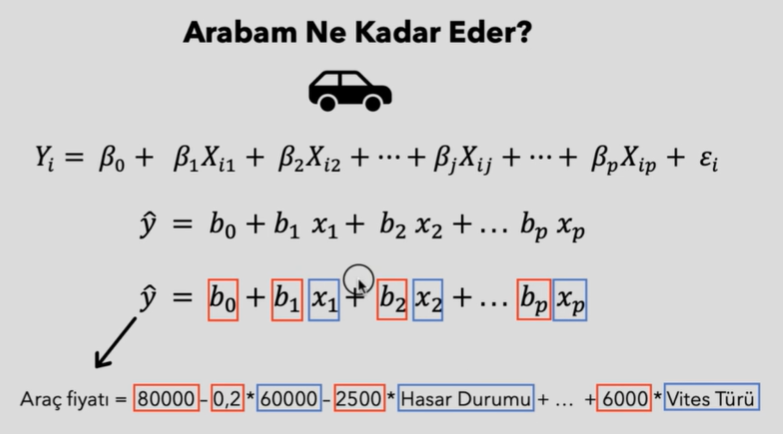

In [1]:
from IPython.display import Image
Image(filename =  "img/arac.png" , width=450, height=400)

* Gözetimli Öğrenme: Veri seti içersinde ilgilendiğimiz bağımlı değişkenimiz varsa --> Araba fiyatı, Öldü-ölmedi, Kadın-erkek vs..
* Gözetimsiz Öğrenme: Bağımlı değişken(Yanıt-Çıktı değişken) yok. 
* Yarı Gözetimli Öğrenme: 
<hr>
* Regresyon: Bağımlı değişken süreklidir. --> Araba fiyatı, başarı yüzdesi vs.
* Sınıflandırma: Bağımlı değişken sürekli değildir. --> Kadın-erkek, öldü-ölmedi vs.
<hr>
* Sayısal değişken ölçekleri: Aralık-Oran
* Kategorik -      -         : Nominal-Ordnal
<hr>
* Test-train: Veri setini 2 parçaya böleriz. Birisiyle veriyi eğitir. Diğeriyle eğittiğimiz veriyi test ederiz.
    * K Katlı çarpraz doğrulama yönteminde eğitim seti de parçalara bölünerek birer birer test edilir ve souçta bir doğrulama(validation) hatası bulunur.

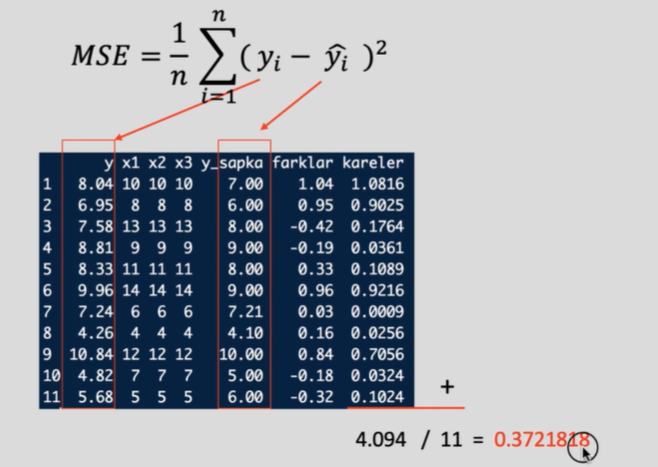

In [2]:
Image(filename =  "img/regg.png" , width=420, height=400)

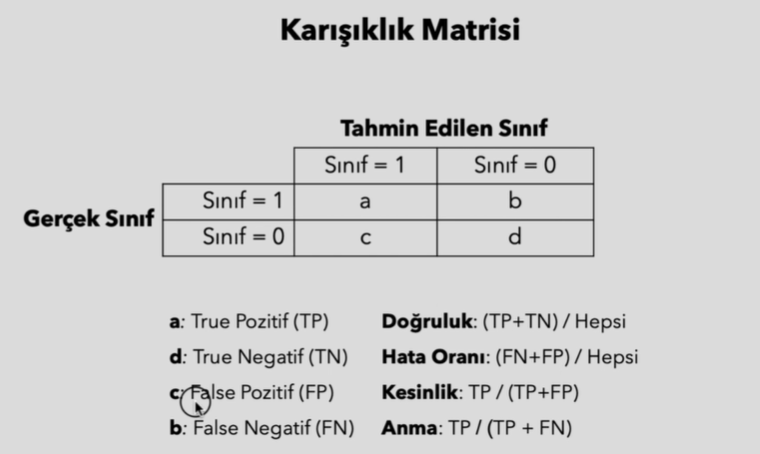

In [3]:
Image(filename =  "img/sınıf.png" , width=420, height=400)

* Kesinlik ve Anma değeri arttıkça başarı da artar.

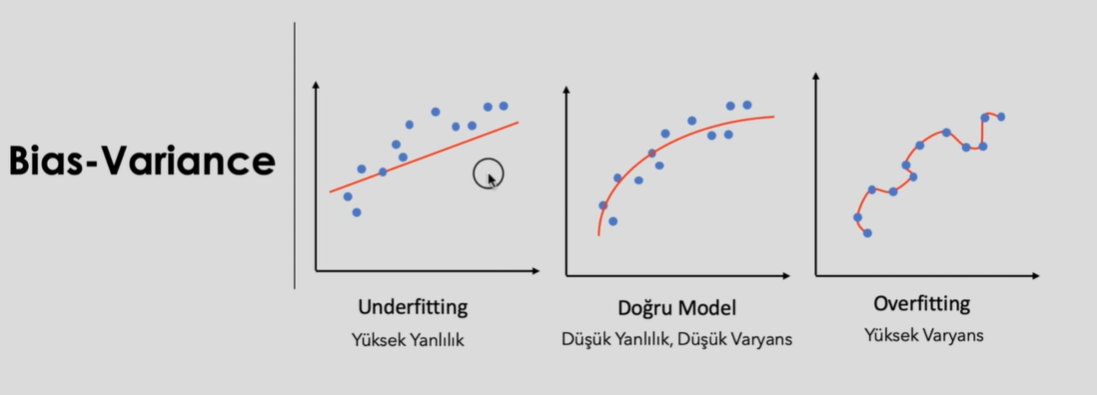

In [4]:
Image(filename =  "img/variance.png" , width=550, height=400)

* Yanlılık: Gerçek değerler ve tahmin edilenler arası mesafe.
    * ilk greafikte yüksek yanlılık var. Doğru gerçek değerleri tahmin etme konusunda az-eksik öğrenmiş. Yüksek yanlılık var. Underfitting--> AZ ÖĞRENMİŞ.
    * Aynı şekilde esnekliği de düşük.
* Varyans: Bir modelin esnekliğidir. Varyans yüksekse esneklik, isabet oranı da yüksektir. Ama fazlası Overfitting'e neden olur. Bu nedenle bu dengenin korunması lazım.
* Eğitimdeki amaç, bir veri setini öğretmektir, ezberletmek değil. Öğrenen bir sistem, daha sonrakilere de kolay adapte olarak bir tahmin ve bağlantı kurabilir. Ama overfitting gerçekleşmişse burada bir öğrenmeden çok ezber vardır. Veri setini kopyalamıştır. Biz böyle bir ezber durumu istemeyiz.
    * Bir sınava girerken sorular sızdırılmış ve sorular ezberlenmiş olsun. Sınava giren çocuk bu soruları ezberlediği için yapar ama, bu sorulara benzer sorular geldiğinde bir ilişki kuramaz ve yapamaz.

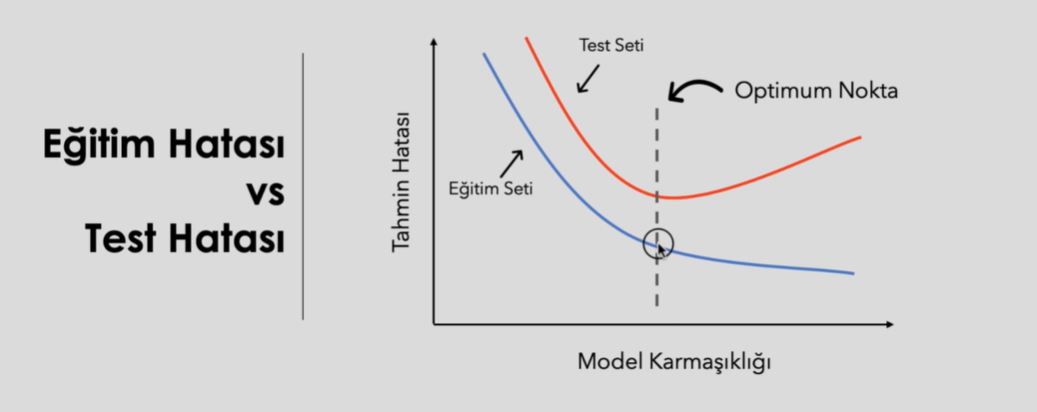

In [5]:
Image(filename =  "img/over.png" , width=550, height=400)

* Veri eğitiminde optimum noktayı iyi tespit etmek lazım. Mesela burada eğitim seti çok iyi eğitiliyor ve tahmin hatası gittikçe azalıyor. Ama optimum noktadan sonra eğitim setinin durması gerekirken daha da fazla eğitiliyor. Bu durumunda artık veri setini ezberlemiş oluyor öğrenmiş değil.
* Bu nedenle optimum noktanın çok iyi tespit edilmesi ve Yanlılık-Varyans dengesinin çok iyi kurulması lazım:
<hr>
<hr>
* Model Parametreleri: Bizzat modelin içinde bulunan parametreler. --> Regresyon kastsayıları vs.
* Hipermarametre: Kullanıcı tarafından kullanılan algoritmayı biçimlendirmek için kullandığı algoritmalar. --> bizim girip seçtiklerimiz.
* Model Tuning: Modelin kendisi için en iyi parametreyi ayarlaması/seçmesi.

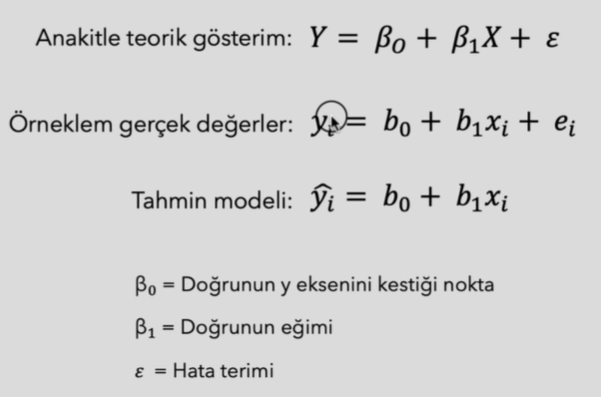

In [6]:
Image(filename =  "img/reg1.png" , width=350, height=400)

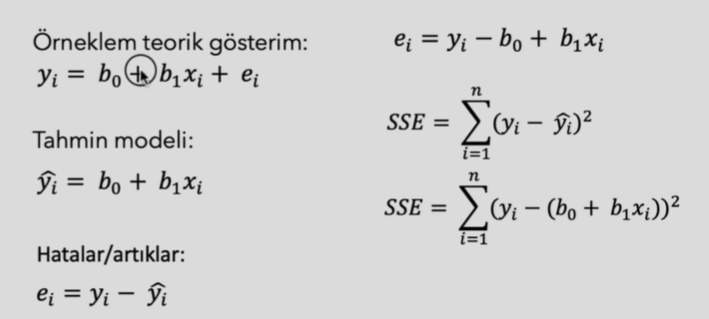

In [7]:
Image(filename =  "img/reg2.png" , width=350, height=400)

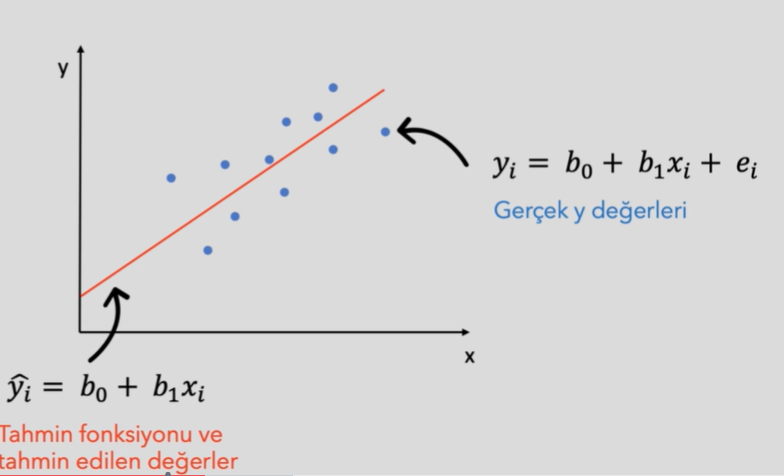

In [8]:
Image(filename =  "img/reg3.png" , width=350, height=400)

## <font color="orange">Basit Doğrusal Regresyon Uygulaması

In [9]:
import pandas as pd
ad = pd.read_csv("original.csv") 
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


* index problemini önlemek için eğer veri seti küçükse, görünmesini istediğimiz columnları
    * ad = pd.read_csv("original.csv",usecols=[1,2,3,4]) şeklinde de ifade edebilirdik. 


In [10]:
df = df.iloc[:,1:len(df)]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.shape

(200, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


* Standart sapmanın yüksek olması, değişkenlerin dağılımlarının geniş olduğunu gösterir. Buna ek olarak median da mean'den büyük veya küçük olsaydı. Böyle bir durumda da, çarpıklık olduğundan söz edebilirdik.

In [14]:
df.isnull().values.any()

False

In [15]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [16]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True);

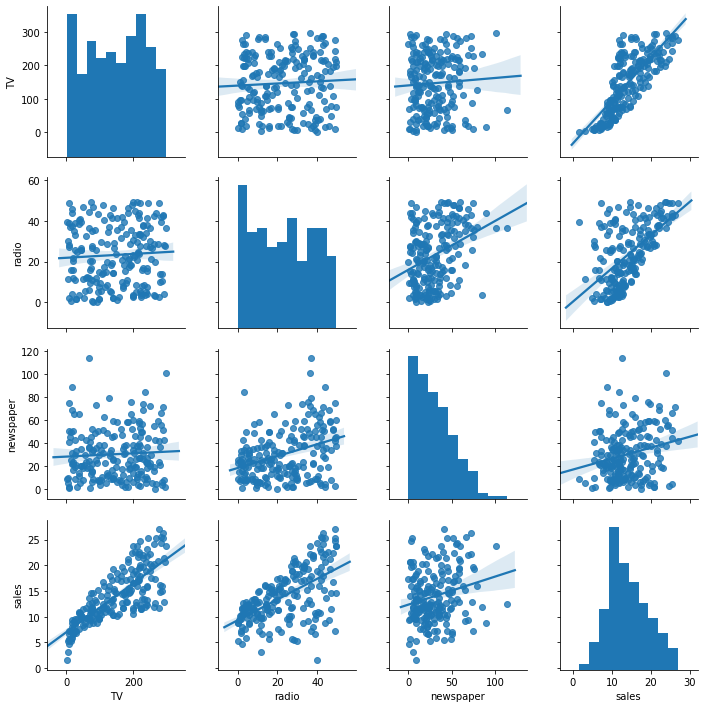

In [17]:
sns.pairplot(df,kind="reg");

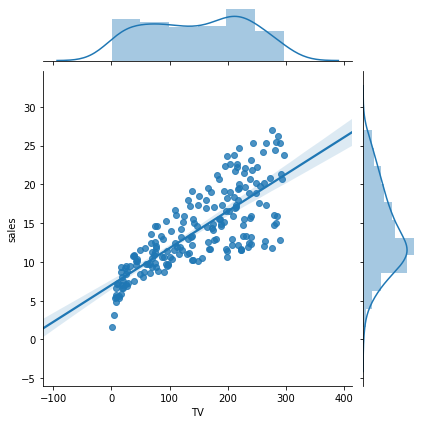

In [18]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

### Statsmodels ile Modelleme

In [19]:
import statsmodels.api as sm

In [20]:
X = df[["TV"]]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
X = sm.add_constant(X)
X.head()

C:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


* Gerekli matris işlemlerinin yapılabilmesi için, veri setine 1 değişkeni ekledik.
* <font color="red"> bağımsız değişken üzerinden matris işlemi yapıp b0,b1 bulacağımız için onu dataframe olarak aldık. </font>

In [22]:
y = df["sales"]
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [23]:
lm = sm.OLS(y,X)

In [24]:
model = lm.fit()

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        17:30:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* <u> Dep.Variable</u>: Bağımlı Değişken
* <u> Method </u>: En küçük kareler(Least Squares)
* <u> R-squared(r-kare) </u>: Bağımsız değişkenin, bağımlı değişkenliği açıklama başarısı.
* <u> F-Statistic </u>: Modelin anlamlılığına ilişkin bir istatistik. 
* <u> Prob </u>: P-value değerinin kendisi
* <u> No.Observation </u> Gözlem sayısı
<hr>
* <u> Coef </u>: Değişkenlerin katsayıları
    * const sabit demektir. coef değeri ise TV'nin başta y'yi kestiği nokta, yani hiç satış olmasa bile başladığı sales değeridir. o da 7.0 yani "b0" değeri.
    * TV kısmındaki coef ise her satışta olacak artış miktarı, yani artış eğimidir. yani "b1"
* <u> std err </u>: Katsayıların standart sapma hataları
* <u> t istatistiği ve P-value </u> p>[t] = 0 ise anlamlıdır.
* <u> 0.25-0.975 </u>: Güven aralıkları
    * Ör: Tv değişkenine ilişkin 0.04 olan katsayımız anlamlıdır ve istatistiksel olarak %95 güvenilirlikle bu aralıkta yer alacaktır.

In [26]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV",df) # (bağımlı,bağımsız)
model = lm.fit()
model.summary()

# Aynı işlemlerin farkı gösterimi

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 20 Apr 2020   Prob (F-statistic):           1.47e-42
Time:                        17:30:39   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [28]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [29]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [30]:
model.f_pvalue # modelin anlamlılığına ilişkin pvalue değerine erişmiş olduk.

1.4673897001947095e-42

In [31]:
print("model_f-pvalue: %.8f" % model.f_pvalue)

model_f-pvalue: 0.00000000


In [32]:
model.mse_model

3314.6181668686486

* Hata kareler ortalaması değeri
    * Ortalaması 14 olan bir değişken için birim başına yapılacak hata için çok büyük bir sayıdır.

In [33]:
model.fittedvalues[0:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

* Tahmin edilen y değerleri

In [34]:
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

* Gerçek y değerleri

* <font color="orange"> <u> Makine öğrenmesi model tahmin denklemini yazınız.

In [35]:
print("Sales: %.5f "%model.params[0],"+ TV * %.5f"%model.params[1])

Sales: 7.03259  + TV * 0.04754


Text(0.5, 0, 'TV Harcamaları')

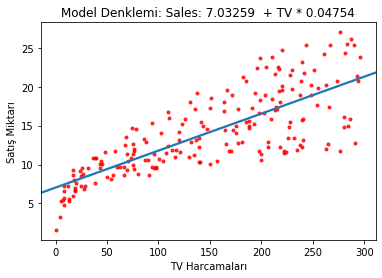

In [36]:
g = sns.regplot(df.TV,df.sales, ci=None, scatter_kws={"color":"r","s":9})
g.set_title("Model Denklemi: Sales: 7.03259  + TV * 0.04754")
g.set_ylabel("Satış Miktarı")
g.set_xlabel("TV Harcamaları")

In [1]:
from sklearn.linear_model import LinearRegression

### Sklearn ile Modelleme

In [38]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [39]:
model.intercept_ # B0 katsayısı

7.032593549127693

In [40]:
model.coef_ # B1 katsayısı

array([0.04753664])

In [41]:
model.score(X,y) #rkare değeri

0.611875050850071

In [42]:
model.predict(X)[0:10]  # tahmin değerler

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Tahmin
* Model Denklemi: Sales: 7.03259  + TV * 0.04754


* Ör: 30 birim TV harcaması olduğunda satış ne kadar olur.

In [43]:
7.0325+30*0.04754

8.4587

In [44]:
model.predict([[30]])

array([8.45869276])

In [45]:
# Birden fazla veri için tahmin gerçekleştireceksek.
veriler = [[8],[18],[45]]

In [46]:
model.predict(veriler)

array([7.41288667, 7.88825308, 9.17174237])

## <font color="orange"> Artıklar ve Makine Öğrenmesindeki Önemi
* <font color="orange"> Birim başına yapılacak olan ortalama hata ---> MSE(Mean squared error) hata kareler ortalaması </font>
* <font color="orange"> np.sqrt(mse) ---> Bunun karekökü ---> RMSE </font>
    

In [47]:
from sklearn.metrics import mean_squared_error, r2_score

In [48]:
lm = smf.ols("sales ~ TV",df)
model = lm.fit()

In [49]:
mse = mean_squared_error(y,model.fittedvalues) # y değeri bağımlı değişkenimiz olan sales'dir

In [50]:
mse # -----> Hata kareler oranı

10.512652915656757

In [51]:
import numpy as np
rmse = np.sqrt(mse)

In [52]:
rmse # Hata kareler oranının karesi

3.2423221486546887

In [53]:
reg.predict(X)[0:10] # tahmin edilen 10 değer

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [54]:
y[0:10] # gerçek 10 değer

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [55]:
import pandas as pd
k_t = pd.DataFrame({"GerçekDeğer":y[0:10],"TahminDeğeri":reg.predict(X)[0:10]})

In [56]:
k_t

,GerçekDeğer,TahminDeğeri
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [57]:
k_t["Hata"] = k_t.GerçekDeğer-k_t.TahminDeğeri
k_t

,GerçekDeğer,TahminDeğeri,Hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [58]:
k_t["hata_kare"] = k_t.Hata**2
k_t

,GerçekDeğer,TahminDeğeri,Hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [59]:
import numpy as np

print("Toplam Hata:", np.sum(k_t.hata_kare))
print("Hata kareler ortalaması(MSE):", np.mean(k_t.hata_kare))
print("RMSE:",np.sqrt(np.mean(k_t.hata_kare)))

Toplam Hata: 92.90350329638103
Hata kareler ortalaması(MSE): 9.290350329638105
RMSE: 3.048007599996776


<hr></hr>
<hr></hr>
* <font color="orange"><b> Amacımız daima, hataların yani artıkların optimize edilip minimum olmasıdır. Bu sayede eğitim de, tahmin de çok daha istenildiği gibi olacaktır. Ama overftting'e dikkat etmek koşulu ile </b> </font>
<hr>
* Yalnız bu analizleri yaparken bu şekilde tüm veri setini baz alan bilgilerdense; verinin %95'inde şu kadar %5 inde bu kadar hata ile karşılaştım gibi bilgiler elde edip, daha sonrasında da bu kısımlara özel olarak inip özel analizler yapmak gerekli. Yoksa genel olarak 1-2 fonksiyon kullanıp genel hatayı vs. bulmak kolay ve çok da analiz gerektirmeyen işler.
<hr>
<hr>

In [60]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

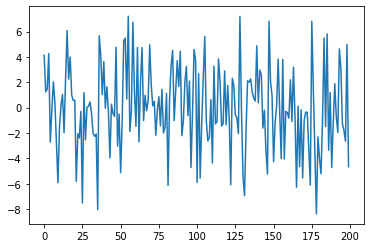

In [61]:
import matplotlib.pyplot as plt
plt.plot(model.resid)

* Burada da artıklar(hatalar)'ın çıktısını aldık ve onları görselleştirdik.
* Örneğin buna bakınca:
    * Neden 6,8,-9 vs gibi çok uçlarda hatalar çıkmış, neden bu kadar outlier artık var gibi sorular sormalı ve bunlara odaklanmalıyız.

## <font color="orange"> Çoklu Doğrusal Regresyon </font>
* Temel amaç, bağımlı ve bağımsız değişkenler arasındaki doğrusal fonksiyonu bulmaktır.
* Hangi bağımsız değişken, bağımlı değişkeni nasıl etkiliyor bu tespit edilir.
    * Mesela km artışı araç fiyatı için nefatif bir etki yapıyorken, vites sayızı pozitif bir etki yapar.

In [62]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [63]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [64]:
X = df.drop("sales",axis=1)
X.head(2)

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1


    * Sadece bağımsız değişkenleri bir veri setine topladık

In [65]:
y = df.sales
y.head(2)

0    22.1
1    10.4
Name: sales, dtype: float64

    * Burada da sadece bağımlı değişkenimizi aldık.

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=42)

* burada test-train yapıları oluştu
* x'in testi ve y'nin testindeki, x'in traini ve y'nin trainindeki gözlem sayıları aynı olduğu için birbirleri ile analizlere sokabileceğiz.

In [67]:
X_train.shape

(160, 3)

In [68]:
y_train.shape

(160,)

In [69]:
y_test.shape

(40,)

In [70]:
X_test.shape

(40, 3)

In [71]:
training = df.copy()
training.shape

(200, 4)

* İhtiyacımıza göre kullanmak için de, veri setimizin ilk halini training değişkenine kopyaladık.

### Statsmodels ile modelleme

In [72]:
lm = sm.OLS(y_train,X_train)

In [73]:
model = lm.fit()

In [74]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Mon, 20 Apr 2020   Prob (F-statistic):                   1.28e-137
Time:                        17:30:41   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Değişkenler arttığı için açıklanabilirlik de arttı dolayısıyla "R-squared" de arttı. %98
* Bütün katsayılar anlamlı --> P> [t]

### Scikit Learn ile model oluşturma

In [75]:
lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [76]:
model.intercept_

2.979067338122629

In [77]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

## Tahmin
* Örneğin 30 birim TV harcaması, 10 birim radyo harcaması, 40 birim gazete satışı olduğunda satışların durumu ne olur.

In [78]:
yeni_veri = [[30],[10],[40]]

In [79]:
yeni_df = pd.DataFrame(yeni_veri).T

In [80]:
""" bu şekilde transpoze alarak 3' değişkene özel 3 farklı veri olmasını sağladık """
yeni_df

,0,1,2
0,30,10,40


In [81]:
yeni_df.shape

(1, 3)

In [82]:
"""TAHMİNİMİZ GERÇEKLEŞTİRDİK."""
model.predict(yeni_df) 

array([6.32334798])

In [83]:
""" Modelimizin tahmin başarısı RMSE / metodları import ettiğimiz için işimiz daha kolay """
rmse = np.sqrt(mean_squared_error(y_train,model.predict(X_train)))
rmse

1.644727765644337

* Yukarda train seti hataları ile ilgilendik, şimdi de test seti tahmin başarısına bakacağız.

In [84]:
rmse = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
rmse

1.7815996615334502

### Çoklu Doğrusal Regresyon- Model Tuning

In [85]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [86]:
X = df.drop("sales",axis=1)
y = df.sales

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state= 42)

lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [87]:
np.sqrt(mean_squared_error(y_train,model.predict(X_train)))

1.644727765644337

In [88]:
model.score(X_train,y_train) # %89 başarı ile bağımsız değişkenler, bağımlı değişkeni açıklayabiliyor.

0.8957008271017818

* Yukarda veri setini bölümlere ayırırlen random_state kullanıyoruz. Burada girdiğimiz değer verinin bölünmesi için önemlidir ve girilen her değer veriyi, r2'yi ve anlamlılığını etkiler. 
* Sonuç olarak en doğru çıktıyı ve r2 sonucunu elde edebilmek için valide edilmiş bir sonuca ihtiyaç duyarız.
* cv değeri: kaç parçaya bölecek, kaç katlı olacak, kaç çıktı çıkarıp bunlara bakacak gibi anlamlara gelir. Yani alttaki işlemlerde girilen veri seti 10 parçaya bölünüp bu 10'u üzerinden bir analiz gerçekleştirilir.

In [89]:
cross_val_score(model,X,y,cv = 10,scoring="r2").mean() # Tüm veri setinin valide edilmiş skoru --> r2

0.8853562237979616

In [90]:
cross_val_score(model,X_train,y_train,cv=10,scoring="r2").mean() # Ayrılan, train edilmiş verilerin skoru 

0.791354859691634

* Şimdi de RMSE' nin valide edilmiş sonucuna hem train hem de test veri seti için bakalım.
* Görüldüğü gibi 10 çıktı çıktı.

In [91]:
valide_rmse= np.sqrt(-cross_val_score(model,
                        X_train,
                        y_train,
                        cv=10,
                        scoring="neg_mean_squared_error"))
valide_rmse

array([2.36072749, 1.69185011, 1.43702708, 1.04492575, 1.28902985,
       1.58333206, 1.71120332, 1.41847523, 2.68793677, 1.28901607])

In [92]:
valide_rmse.mean() # Yukarda bu değer 1.64... çıkmıştı.

1.6513523730313335

In [93]:
valide_rmse= np.sqrt(-cross_val_score(model,
                        X_test,
                        y_test,
                        cv=10,
                        scoring="neg_mean_squared_error"))
valide_rmse

array([1.60277541, 1.61194322, 2.04331391, 2.17588559, 1.43957487,
       1.34777557, 1.90490016, 2.08722286, 2.24389953, 2.0054877 ])

In [94]:
valide_rmse.mean() # yukardakine göre, özellikle test kısmında rmse değeri iyice arttı.

1.8462778823997095

### <font color="orange"> PCR - Temel Bileşen Regresyonu </font>
* Önce değişkenlere boyut indirgeme uygulanır. Sonra da çıkan bileşenlere bir regresyon modeli uygulanır.
* Örneğin elimizde 100 tane değişken var, biz ise bu değişkenlerin ifade ettiği bilgiyi, daha az değişkenle maksimum olarak ifade etmeye çalışırız. Mesela 2 değişken ile. Bir miktar bilgi kaybı olur ama bu bilgi kaybını da minimuma indirmeyi amaçlarız.
    * Çok az değişkene indirgediğimiz için de, çok boyutluluk laneti ortadan kalmış oluyor.

In [95]:
hit = pd.read_csv("hitters.csv")
df = hit.copy()
df = df.dropna() # veri setindeki eksik gözlemleri tamamen sildik.
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
AtBat        263 non-null int64
Hits         263 non-null int64
HmRun        263 non-null int64
Runs         263 non-null int64
RBI          263 non-null int64
Walks        263 non-null int64
Years        263 non-null int64
CAtBat       263 non-null int64
CHits        263 non-null int64
CHmRun       263 non-null int64
CRuns        263 non-null int64
CRBI         263 non-null int64
CWalks       263 non-null int64
League       263 non-null object
Division     263 non-null object
PutOuts      263 non-null int64
Assists      263 non-null int64
Errors       263 non-null int64
Salary       263 non-null float64
NewLeague    263 non-null object
dtypes: float64(1), int64(16), object(3)
memory usage: 43.1+ KB


In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AtBat,263.0,403.642586,147.307209,19.0,282.5,413.0,526.0,687.0
Hits,263.0,107.828897,45.125326,1.0,71.5,103.0,141.5,238.0
HmRun,263.0,11.619772,8.757108,0.0,5.0,9.0,18.0,40.0
Runs,263.0,54.745247,25.539816,0.0,33.5,52.0,73.0,130.0
RBI,263.0,51.486692,25.882714,0.0,30.0,47.0,71.0,121.0
Walks,263.0,41.114068,21.718056,0.0,23.0,37.0,57.0,105.0
Years,263.0,7.311787,4.793616,1.0,4.0,6.0,10.0,24.0
CAtBat,263.0,2657.543726,2286.582929,19.0,842.5,1931.0,3890.5,14053.0
CHits,263.0,722.186312,648.199644,4.0,212.0,516.0,1054.0,4256.0
CHmRun,263.0,69.239544,82.197581,0.0,15.0,40.0,92.5,548.0


In [98]:
df.isnull().values.any()

False

* Kategorik değişkenleri dummies değişken formatına dönüştürüdük.
* Kategorik değişkenler bu şekilde dönüştürülürken Nominal veye Ordinal olup olmadıklarına çok dikkat etmek lazım . 
* Eğer Ordinal ise (Kadın-Erkek,Eğitim seviyesi) bu tarz bir dönüşüm yapmak çok karlı olabilir.
* Ama eğer bu örnekteki gibi nominal bir durum varsa, değişkenler arasında bir ilişki olmadığı halde onları 0-3 arası değerlere hapsetmiş olduk ve bu da makine öğrenmesi aşamasında çok gereksiz sıkıntılar yaşatabilmekte.

In [99]:
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
dms.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [100]:
y = df.Salary

In [101]:
X_ = df.drop(["Salary","League","Division","NewLeague"],axis=1).astype("float64")

In [102]:
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1 )
X.head() # Bağımsız değişkenlerimizi bir yerde topladık:

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (197, 19)
y_train (197,)
X_test (66, 19)
y_test (66,)
training (263, 20)


In [104]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [105]:
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_train[0:1,:]

array([[-2.49569913e+00, -3.37762397e-01,  7.06391950e-01,
        -1.32791025e+00, -8.21824333e-01, -6.62790677e-01,
        -6.56764789e-01,  3.68093279e-02, -2.03665105e-01,
         1.76134815e-01, -9.20131987e-02,  2.40129020e-01,
        -3.60473661e-03, -3.41246327e-02,  4.32799605e-02,
         1.02996923e-01,  3.70733348e-03,  1.37933445e-03,
        -6.63814471e-03]])

* Birinci gözlemi, bütün bileşenler üzerinde görmüş olduk.
* 19 bileşene indirgendiğini burada görüyoruz.

In [106]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:10]

array([38.18, 59.88, 70.88, 78.88, 84.18, 88.45, 92.05, 94.86, 96.34,
       97.28])

* Bileşen sayısı arttıkça; varyansın, değişkenleri açıklama yüzdesini görüyoruz.
* Tek değişken ile 38.18, iki değişken ile 59.88 vs. şeklinde 100'e kadar gidecek.

In [107]:
lm = LinearRegression()

In [108]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [109]:
pcr_model.intercept_

543.4834416243655

In [110]:
pcr_model.coef_

array([ 111.13977427,  -29.34209502,   26.29799759,  -38.47549852,
        -56.9200785 ,   54.44779423,   40.77493384,  -23.72746012,
          9.31198164,   13.02031672,   45.58357748,   31.97791627,
         18.93930958, -115.60940171,   24.00382778,  415.70806202,
       -449.51779543,  563.07375399,  302.53718462])

### Tahmin

In [111]:
y_pred = pcr_model.predict(X_reduced_train)

In [112]:
y_pred[0:5]

array([377.44484744, 802.19452124, 495.60987745, 112.53177731,
       426.21613066])

In [113]:
np.sqrt(mean_squared_error(y_train, y_pred))

289.3292825564976

In [114]:
df["Salary"].mean()

535.9258821292775

In [115]:
r2_score(y_train, y_pred)

0.5770075250410179

In [116]:
pca2 = PCA()

In [117]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [118]:
y_pred = pcr_model.predict(X_reduced_test)

In [119]:
np.sqrt(mean_squared_error(y_test, y_pred))

405.15753641499646

### Model Tuning

In [120]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

390.79142556822234


In [121]:
from sklearn import model_selection

In [122]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [123]:
lm = LinearRegression()

In [124]:
RMSE = []

In [125]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

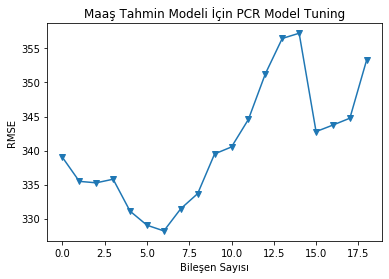

In [126]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Maaş Tahmin Modeli İçin PCR Model Tuning');

In [127]:
lm = LinearRegression()

In [128]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [129]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [130]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

308.8265983094501


In [131]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [132]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

393.1198700096223


## <font color="orange"> PLS (Kısmi En küçük kareler Regresyonu) </font>
* Yine bileşenler indirenip, üzerlerine regresyon kurulması fikrine dayanır.
* PCR' den en temel farkı, burada bağımlı değişkene odaklanarak bir nevi gözetimli bir boyut indirgeme yapılırken; PCR' da bağımsız değişkenler kendileri arasında yani bir nevi gözetimsiz boyut indirgeme ile bu işlemler gerçekleşiyordu.

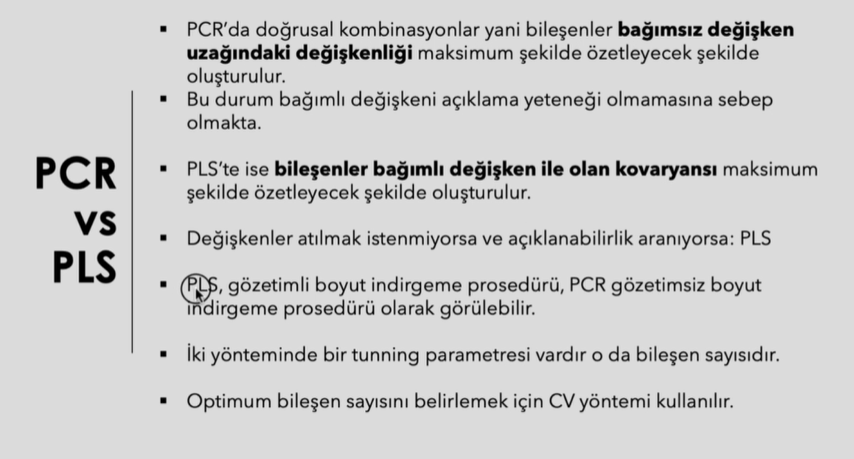

In [133]:
Image(filename="img/pls.png",width=600,height=500)

### Model Oluşturma

In [134]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [135]:
from sklearn.cross_decomposition import PLSRegression, PLSSVD

In [136]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

* PLSRegression parametresi olaran n_componenets=.. diyerek bileşen sayısı belirleyebiliriz. Yalnız kaç bileşen belirlersek belirleyelim, aşağıda katsayı olarak aynı sayıda katsayı gelecek.
* <font color="red"> Bu bileşen değeri --> minimum hatayı almak için gerekli olan değer nedirin cevabı olan: Cross Validation ile bulunur ve bu CV sonucunda bulunan değer uygulananarak fit etme işlemi gerçekleştiğinde, en düşük hata ile bir PLS modeli gerçekleştirmiş oluruz. </font>

In [137]:
pls_model.coef_

array([[ 35.32916493],
       [ 48.83425857],
       [ 18.50240933],
       [ 39.28117603],
       [ 30.59952998],
       [ 40.03398345],
       [ 16.85990516],
       [ 28.22289896],
       [ 32.73784993],
       [ 22.00875744],
       [ 33.60903032],
       [ 30.39402522],
       [ 25.73279799],
       [ 54.98835148],
       [  6.56590871],
       [ -0.90894359],
       [ 17.60903423],
       [-37.24246339],
       [ 14.69680385]])

### Tahmin 

In [138]:
pls_model

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [139]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
183,328.0,91.0,12.0,51.0,43.0,33.0,2.0,342.0,94.0,12.0,51.0,44.0,33.0,145.0,59.0,8.0,1,0,1
229,514.0,144.0,0.0,67.0,54.0,79.0,9.0,4739.0,1169.0,13.0,583.0,374.0,528.0,229.0,453.0,15.0,1,0,1
286,593.0,152.0,23.0,69.0,75.0,53.0,6.0,2765.0,686.0,133.0,369.0,384.0,321.0,315.0,10.0,6.0,0,1,0
102,233.0,49.0,2.0,41.0,23.0,18.0,8.0,1350.0,336.0,7.0,166.0,122.0,106.0,102.0,132.0,10.0,0,0,0
153,341.0,95.0,6.0,48.0,42.0,20.0,10.0,2964.0,808.0,81.0,379.0,428.0,221.0,158.0,4.0,5.0,1,1,1


In [140]:
pls_model.predict(X_train)[0:15]

array([[ 344.91941493],
       [ 848.87070769],
       [ 692.93622642],
       [ 185.56577984],
       [ 435.49196077],
       [ 987.49530026],
       [ 120.63097106],
       [ 289.9263406 ],
       [ 663.41886918],
       [ 817.90486641],
       [1400.82155793],
       [ 889.55177741],
       [ 966.02942625],
       [ 761.83859363],
       [ 817.87219643]])

* pls_modele çok değişkenli bir bağımsız değişken eğitim seti yolladık ve o bunların her birisinin analizini yaparak bize bağımlı değişken tahminleri çıkardı.

In [141]:
y_pred = pls_model.predict(X_train)

In [142]:
np.sqrt(mean_squared_error(y_train,y_pred))

310.1167593109696

In [143]:
r2_score(y_train,y_pred)

0.5140424486535482

* Normalde y_train,X_train yapardık ama burada y_train,y_pred yaptık NEDEN???
    * Aslında mesele tamamen değişken karmaşası çünkü y_pred dediğimiz şey aslında X_trainin uygulandığı ve ortaya çıkan tahmin değerleri. Durum böyle olunca da:
    * rmse hesaplarken(gerçekdegerler,plstahminleri) şeklinde hesaplamış oluyoruz.
    
    * Yani her şey yolunda.

In [144]:
y_pred = pls_model.predict(X_test)

In [145]:
np.sqrt(mean_squared_error(y_test,y_pred))

398.09956327448526

In [146]:
r2_score(y_test,y_pred)

0.2678940112232917

### Model Tuning
* <font color="grey"> <b> Cross Validation: </b> En düşük hatayı verecek bileşen sayısı nedir?. Bunu bulmak için uygulanan yöntem </font>

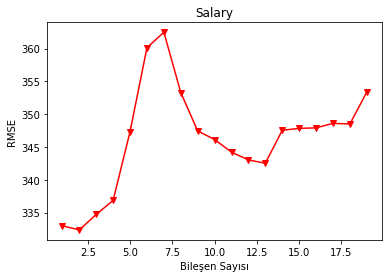

In [147]:
#CV
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)


#Hata hesaplamak için döngü
RMSE = []

for i in np.arange(1, X_train.shape[1] + 1):
    pls = PLSRegression(n_components=i)
    score = np.sqrt(-1*cross_val_score(pls, X_train, y_train, cv=cv_10, scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

#Sonuçların Görselleştirilmesi
plt.plot(np.arange(1, X_train.shape[1] + 1), np.array(RMSE), '-v', c = "r")
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Salary');

In [148]:
pls_model = PLSRegression(n_components=2).fit(X_train, y_train)

In [149]:
y_pred = pls_model.predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

398.09956327448526

## <font color="orange"> Ridge Regresyon </font>
* Amaç: hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmatır.
* Cezadan kasıt: katsayıları azaltıp, "neredeyse" 0'a indirmek

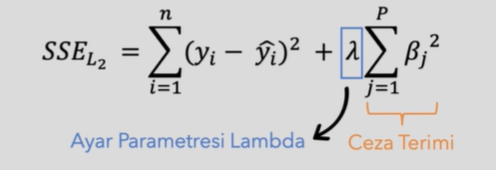

In [151]:
Image(filename="img/ridge.png",width=450,height=500)

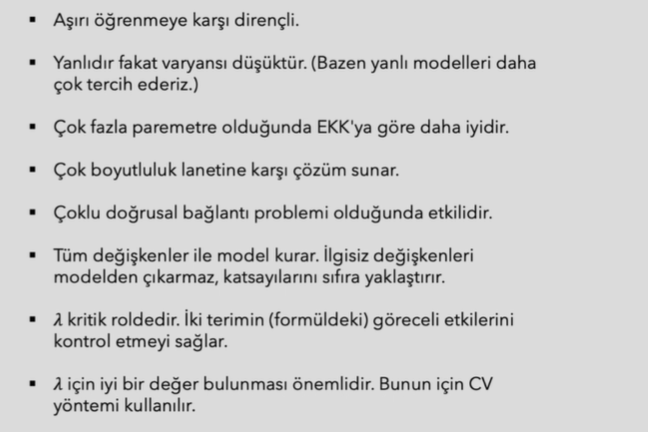

In [152]:
Image(filename="img/ridge2.png",width=450,height=500)

### Modelleme

In [153]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [154]:
from sklearn.linear_model import Ridge

In [155]:
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)

In [156]:
ridge_model

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [157]:
ridge_model.coef_ # katsayılarımız. // intercept_ -> b0, coef_ -> b1

array([ -1.77435737,   8.80240528,   7.29595605,  -3.33257639,
        -2.08316481,   5.42531283,   7.58514945,  -0.13752764,
        -0.20779701,  -0.60361067,   1.7927957 ,   0.72866408,
        -0.68710375,   0.26153564,   0.26888652,  -0.52674278,
       112.14640272, -99.80997876, -48.07152768])

In [158]:
10**np.linspace(10,-2,100)*0.5 

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [168]:
np.linspace(10,2,100)[0:20] # totalde 100 girdi ile 10'dan 0'a kadar 2'lik bir oranla azalacak değerler.

array([10.        ,  9.91919192,  9.83838384,  9.75757576,  9.67676768,
        9.5959596 ,  9.51515152,  9.43434343,  9.35353535,  9.27272727,
        9.19191919,  9.11111111,  9.03030303,  8.94949495,  8.86868687,
        8.78787879,  8.70707071,  8.62626263,  8.54545455,  8.46464646])

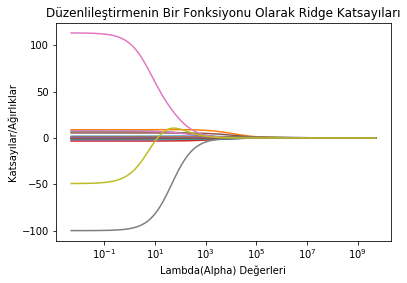

In [169]:
lambdalar = 10**np.linspace(10,-2,100)*0.5 

ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha = i)
    ridge_model.fit(X_train, y_train) 
    katsayilar.append(ridge_model.coef_) 
    

    
ax = plt.gca()
ax.plot(lambdalar, katsayilar) 
ax.set_xscale('log') 

plt.xlabel('Lambda(Alpha) Değerleri')
plt.ylabel('Katsayılar/Ağırlıklar')
plt.title('Düzenlileştirmenin Bir Fonksiyonu Olarak Ridge Katsayıları');

* Lambda(alfa) değeri arttıkça, katsayılarda da eş olarak bir azalma söz konusu.
* Ama unutma ki ridge regresyonda katsayılar hiç bir zaman sıfırlanmaz, ama birbirleriyle ilişkilerini dengelyecek şelilde 0'a yakın bir duruma gelirler.

### Tahmin

In [170]:
y_pred = ridge_model.predict(X_test) 

In [177]:
y_pred[10:100] # X_test değerlerinin ridge_modele uygulanmış halleri

array([ 686.16114892,  887.8468876 ,  224.6572569 ,  443.09934783,
        265.72100572,  506.75991986,  805.11742238,   42.77022223,
       1236.60742663,  317.43905148,  427.27485576,  745.3196889 ,
        571.74551315,  650.77106329,  619.32330433,  201.88331799,
        897.89629948,  252.64169047,  428.50988316,   82.65493884,
        143.84199242,  128.82215557,  372.94869728,  462.69437621,
        273.79600811,  253.39442039, 1325.69533764,  105.11839263,
        134.68089785,  244.8800595 ,   52.58867779,  299.21627776,
        585.29052254,  399.80806977,  764.53279675,  675.70525767,
        358.51903107,  246.39265924,  252.55124532,  667.45403674,
        753.22289418,  321.47085988,  772.97674426,  186.76814955,
        280.28571668,  592.84036294,  668.56385917,  809.18520565,
        159.01452537, 1166.23019082, 1660.58793639,  412.74573823,
        995.54533961,  489.1229557 ,  587.68202855,  186.92707532])

In [179]:
np.sqrt(mean_squared_error(y_test,y_pred)) # RMSE

357.0517922282844

### Model Tuning
* Burada Cross Valiadtion yapmak çok kolay çünkü, otomatik hesaplama fonksiyonu var.

In [180]:
from sklearn.linear_model import RidgeCV

In [181]:
ridge_cv = RidgeCV(alphas = lambdalar, 
                   scoring="neg_mean_squared_error", 
                   normalize=True)

* Bir model oluşturduk. Şimdi ise bu modelimizin alfasına bakacağız. Sonrasında da, tune edilmiş ve alfamızın uygulandığı son modeli oluşturacağız.

In [185]:
ridge_cv.fit(X_train,y_train) # eğitim verilerimizi cv uygulanmış ridge modelimize fit ediyoruz

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [184]:
ridge_cv.alpha_

0.7599555414764666

In [186]:
ridge_tuned = Ridge(alpha=ridge_cv.alpha_, normalize=True).fit(X_train,y_train)

In [187]:
np.sqrt(mean_squared_error(y_test,ridge_tuned.predict(X_test)))

386.6826429756415

## <font color="orange"> Lasso Regresyon </font>
* Amaç: hata kareler toplamını minimize eden katsayıları, bu katsayılara bir ceza uygulayarak bulmatır.
* Bu ceza, Ridge'den farklı olarak 0'a iner. Yani değişken seçer. Kimi değişkenlerin katasyısını 0 yaparak o değişkeni gözardı eder.

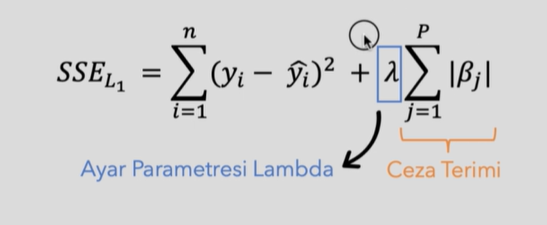

In [188]:
Image(filename="img/lasso.png", width=450, height=450)

### Modelleme

In [189]:
from sklearn.linear_model import Lasso

In [192]:
lasso_model = Lasso(alpha= 0.1).fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8249174.751388096, tolerance: 3898.686956380658
  positive)


In [193]:
lasso_model

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [195]:
lasso_model.coef_[0:20]

array([-1.72206506e+00,  8.56210197e+00,  6.91175137e+00, -3.13240128e+00,
       -2.00771676e+00,  5.36159035e+00,  8.86871593e+00, -1.69520371e-01,
       -5.58121413e-02, -3.53962588e-01,  1.70961000e+00,  6.40603469e-01,
       -6.58519895e-01,  2.60093222e-01,  2.78717030e-01, -5.92690965e-01,
        1.12659630e+02, -9.99652090e+01, -4.81289395e+01])

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5469.558741401881, tolerance: 3898.686956380658
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6540.147679608315, tolerance: 3898.686956380658
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4001.756137549877, tolerance: 3898.686956380658
  positive)
C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5357.774935673922, tolerance: 3898.686956380658
  po

Text(0, 0.5, 'weights')

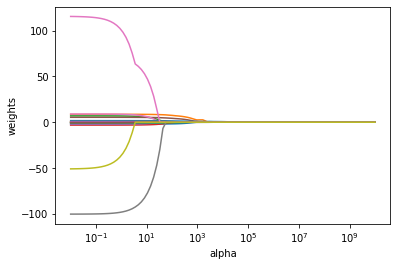

In [196]:
lasso = Lasso()
lambdalar = 10**np.linspace(10,-2,100)*0.5 
katsayilar = []

for i in lambdalar:
    lasso.set_params(alpha=i)
    lasso.fit(X_train, y_train)
    katsayilar.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdalar*2, katsayilar)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

### Tahmin

In [197]:
lasso_model.predict(X_test)

array([ 613.88833029,  701.97056731, 1005.55539526,  414.08312603,
        399.18417127,  344.71444139,  664.86990217,  451.60757   ,
        914.64492066,  644.67006406,  691.60613554,  884.71702368,
        210.04523766,  446.12527252,  262.94922087,  499.22332142,
        805.2275034 ,   43.49230343, 1250.49322312,  316.34470193,
        422.96656686,  743.29944548,  572.90774248,  655.15609074,
        618.96407069,  200.75845796,  882.64622066,  254.06366112,
        430.25494812,   84.17391461,  143.60312305,  130.61554   ,
        363.74498233,  461.7321162 ,  273.42345417,  244.49816262,
       1324.62748553,  107.89909718,  135.63065031,  242.72630885,
         51.70024086,  297.57598929,  586.86143037,  398.85227639,
        763.99543074,  690.10003532,  344.06272851,  247.43966241,
        255.13234043,  662.89091837,  765.66189   ,  313.57347726,
        765.84996179,  189.77235179,  283.98765436,  589.95238974,
        663.31166365,  803.29524626,  164.99767232, 1170.24294

In [198]:
y_pred = lasso_model.predict(X_test)

In [199]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.7545270148768

### Model Tuning

In [200]:
from sklearn.linear_model import LassoCV

In [202]:
lasso_cv_model = LassoCV(alphas=None, 
                         cv=10, 
                         max_iter=10000, 
                         normalize=True)

In [203]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [204]:
lasso_cv_model.alpha_ # Modelin optimum cv'si

0.39406126432470073

In [205]:
lasso_tuned = Lasso(alpha=lasso_cv_model.alpha_)

In [206]:
lasso_tuned.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8252823.943523985, tolerance: 3898.686956380658
  positive)


Lasso(alpha=0.39406126432470073, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [207]:
y_pred = lasso_tuned.predict(X_test)

In [208]:
np.sqrt(mean_squared_error(y_test,y_pred))

356.5226376958367

* Ridge regressyona göre çok daha başarılı bir başarı sağlamış olduk.

## <font color="orange"> Elastic Net (eNet) Regresyonu </font>
* Amaç yine hata kareler toplamını minimize eden katsayıları, bu katsayılara ceza uygulayarak bulmaktır.
* RİDGE+LASSO olarak düşünülebilir. Bu nedenle ikisinin birleşip evrimleşmiş halidir.
    * Genel itibari ile düşünürsek "doğrusal regresyonların en etkilisidir" --> ama bu tabi veri setine göre değişebilir.

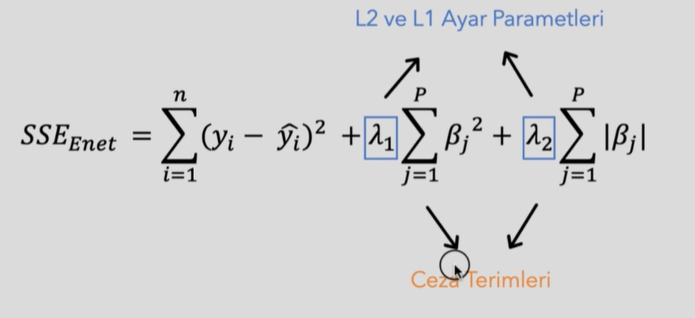

In [209]:
Image(filename = "img/enet.png",width=450, height=450)

In [210]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
ms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)



In [213]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,1,1,1
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,0,1,0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,1,0,1
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,1,0,1
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,282.0,421.0,25.0,0,1,0


In [214]:
y.head()

1    475.0
2    480.0
3    500.0
4     91.5
5    750.0
Name: Salary, dtype: float64

### Model Kurma

In [215]:
from sklearn.linear_model import ElasticNet

In [216]:
enet_model = ElasticNet().fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8487984.799367279, tolerance: 3898.686956380658
  positive)


<font color="orange"> <b> Model kurarken eğitim(train) setlerini, regresyon metodumuza fit ediyoruz </b> </font>

In [217]:
enet_model.coef_

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [220]:
enet_model.intercept_ # Lineer modelimizdeki line'ın y yi kestiği yer. Yani sabit

-6.465955602113127

### Tahmin

In [221]:
enet_model.predict(X_test)

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123,  702.9157117 ,  931.50283407,
        184.87939803,  385.14973787,  325.38944176,  546.99346574,
        774.28001821,  101.83114992, 1250.86758812,  370.67651244,
        442.05734523,  781.17288513,  578.63736538,  609.31927808,
        608.31719597,  227.46556223,  921.85505228,  301.1202457 ,
        386.31721051,  133.61143326,  162.28505608,   88.29793182,
        359.9068418 ,  422.51268445,  265.8663769 ,  355.70450908,
       1329.36312363,  125.05506935,   82.74580002,  269.17483075,
        117.13319397,  274.13484779,  648.4957249 ,  409.47065999,
        846.27919406,  712.04817644,  341.10596674,  368.24259678,
        305.70477656,  680.05724792,  716.13640636,  295.93204262,
        773.06445823,  249.28224916,  221.46794589,  541.2713245 ,
        611.50212372,  770.80228024,  168.45143906, 1159.05660

In [222]:
y_pred = enet_model.predict(X_test)

In [223]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181244

In [224]:
r2_score(y_test,y_pred)

0.41070222469326945

### Model Tuning

In [226]:
from sklearn.linear_model import ElasticNetCV

In [227]:
enet_cv_model = ElasticNetCV(cv = 10, random_state = 0).fit(X_train, y_train)

In [228]:
enet_cv_model.alpha_

5230.7647364798695

In [229]:
enet_cv_model

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto', random_state=0,
             selection='cyclic', tol=0.0001, verbose=0)

In [230]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(X_train,y_train)

In [231]:
y_pred = enet_tuned.predict(X_test)